# Исследование успешности игр
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).

**Цель исследования** :
1. Выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Ход исследования**

Данные о играх получины из файла `'/datasets/games.csv'`. Перед проверкой гипотез понадобится обзор данных. 

Проверим данные на ошибки и оценим их влияние на исследование. Затем, на этапе предобработки поищем возможность исправить самые критичные ошибки в данных. Проведем исследовательский анализ, проверим гипотезы и составим портрет пользователя каждого региона.
 
Таким образом, исследование пройдёт в три этапа:
 1. Общий анализ.
 2. Подготовка данных.
 3. Проводим исследовательский анализ данных.
 4. Составляем портрет пользователя каждого региона.
 5. Проверка гипотез.
 6. Общий вывод.


### Общий анализ.

#### Открываем файл с данными и изучаем общую информацию

In [1]:
import pandas as pd # импортируем бибилиотеки
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv('/datasets/games.csv')  # читаем файл csv

display(df.head(10)) # первые сьтроки датасета
display(df.tail()) # последние сьтроки датасета

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


In [3]:
df.info() # основная информация

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
# общие показатели
display(df.describe())

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [5]:
df.isna().sum().sort_values(ascending=False)  # кол-во пропусков по столбцам

Critic_Score       8578
Rating             6766
User_Score         6701
Year_of_Release     269
Name                  2
Genre                 2
Platform              0
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
dtype: int64

In [6]:
#процент пропусков от всего датасета
display(df.isna().mean().sort_values(ascending=False)*100)

Critic_Score       51.319174
Rating             40.478612
User_Score         40.089740
Year_of_Release     1.609333
Name                0.011965
Genre               0.011965
Platform            0.000000
NA_sales            0.000000
EU_sales            0.000000
JP_sales            0.000000
Other_sales         0.000000
dtype: float64

In [7]:
pd.DataFrame(
    round(df.isna().mean().sort_values(ascending=False)*100,1)).style.background_gradient('coolwarm')

,0
Critic_Score,51.300000
Rating,40.500000
User_Score,40.100000
Year_of_Release,1.600000
Name,0.000000
Genre,0.000000
Platform,0.000000
NA_sales,0.000000
EU_sales,0.000000
JP_sales,0.000000


In [8]:
df.duplicated().sum() # проверка на явные дубликаты

0

In [9]:
corr_df = df.corr() # формируем матрицу корреляции
corr_df.style.background_gradient(cmap='coolwarm') # применяем расцветку ячеек

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
Year_of_Release,1.000000,-0.092500,0.003978,-0.168366,0.037820,0.011411
NA_sales,-0.092500,1.000000,0.765335,0.449594,0.638649,0.240755
EU_sales,0.003978,0.765335,1.000000,0.435061,0.722792,0.220752
JP_sales,-0.168366,0.449594,0.435061,1.000000,0.291089,0.152593
Other_sales,0.037820,0.638649,0.722792,0.291089,1.000000,0.198554
Critic_Score,0.011411,0.240755,0.220752,0.152593,0.198554,1.000000


**Обнаружены пропуски в датасете, количество в некоторых столбце достигало 88%. Количество столбцов с пропусками 6 (всего в датасете 11 столбца). Явных дубликатов нет.
Необходимо скорректировать user_score(оценки пользователей)  - некорректный тип, должен быть с плавающей точкой. Так же разно регистровое наименование столбцов.**

### Подготовка данных

In [10]:
# приведение наименования столбцов к нижнему регистру
df.columns = df.columns.str.lower()
# проверяем внесенные изменения
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

#### Распределения, типы данных, пропуски.

In [11]:
# смотрим уникальные значения года выпуска
display(df.year_of_release.unique())
display(len(df['year_of_release'].unique()))  # кол-во уникальных значений

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

38

In [12]:
# смотрим другие пропуски в столбцах, где отсуствует год релиза.
df_year_of_release_isna = df.loc[df['year_of_release'].isna()]
df_year_of_release_isna.isna().sum().sort_values(ascending=False)

year_of_release    269
critic_score       115
user_score          94
rating              88
name                 0
platform             0
genre                0
na_sales             0
eu_sales             0
jp_sales             0
other_sales          0
dtype: int64

Удаляем пустые строки с годом релиза игры т.к. их доля в тадасете всего 1,6% и данный параметр один из самых важных при исследовании. Так же в этих строках имеются пропуски рейтинга, оценок критиков и пользователей. Таким образом мы оптимизировали датаесет сразу по нескольким параметрам.

In [13]:
df = df.dropna(subset=['year_of_release']).reset_index(drop=True) #удаление пропусков и сброс индекса
df['year_of_release'].isna().sum() #проверка

0

In [14]:
df['year_of_release'] = np.ceil(df['year_of_release']).astype(int) # меняем тип на int

In [15]:
# смотрим значения рейтинга и их кол-во
df['rating'].value_counts()

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
RP         1
AO         1
Name: rating, dtype: int64

Процент пропусков рейтинга в данных 40%. Такую большую долю пропусков целесообразно заполнить "заглушкой" и обращать внимание на нее при категоризации в дальнейшем.

In [16]:
df_rating_isna = df.loc[df['rating'].isna()] # переменная датафрейма с пустыми рейтингами
df_rating_isna.isna().sum().sort_values(ascending=False)

rating             6678
critic_score       6597
user_score         6545
name                  2
genre                 2
platform              0
year_of_release       0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
dtype: int64

Видим, что пустые строки в рейтинге совпадаю с пустыми строками с оценками пользователей и критиков.

In [17]:
# загрушка
df.loc[df['rating'].isna(), 'rating'] = 'unknown'

In [18]:
df['rating'].isna().sum() #проверка

0

In [19]:
display(df['user_score'].unique())
display(len(df['user_score'].unique()))  # кол-во уникальных значений оценок пользователей
df['user_score'].value_counts().head() # самые популярные значения оценок пользователей

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

97

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
Name: user_score, dtype: int64

Аббревиатура 'tbd' в столбце с оценкой встречается чаще всего. Очевидно это не означает отсутствие рейтинга т.к. имеются игры с оценкой 0. Из открытых источников определили, что 'tbd'- To Be Determined, то есть "Будет определено" и скорее всего относится к играм с недавним релизом. Проверим эту гипотезу.

'Количетво годов в которых есть tbd - '

19

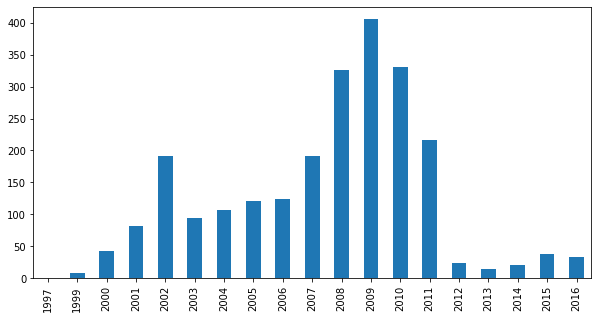

In [20]:
display(
      'Количетво годов в которых есть tbd - ',
      len(df[df['user_score'] == 'tbd']['year_of_release'].unique())
     )
(df[df['user_score'] == 'tbd']['year_of_release']
 .value_counts().sort_index(ascending=True)
 .plot(kind='bar', figsize = (10,5))
);

'tbd' распределен на последние 20 лет исследуемых данных. Отсутствующий рейтинг игры пользователем не можем объяснить датой релиза. Вместе с тем, пропусков рейтинга слишком много, чтобы мы могли их удалить или восстановить каким-либо логическим способом.
Правильным решением будет оставить пропуски заменить 'tbd' на nan.

In [21]:
df['user_score'] = df['user_score'].replace('tbd', np.nan) # 'tbd' в nan

In [22]:
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce') # меняем тип столбца на числовой

In [23]:
df['user_score'].value_counts().head() # проверяем тип и наличие 'tbd'

7.8    322
8.0    285
8.2    276
8.3    252
7.5    249
Name: user_score, dtype: int64

In [24]:
display(df['critic_score'].unique()) # смотрим значения столбца оценок критиков
display(len(df['critic_score'].unique()))  # кол-во уникальных значений оценок критиков
df['critic_score'].value_counts().head()# самые популярные значения оценок критиков

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

82

70.0    252
71.0    248
75.0    240
80.0    235
73.0    234
Name: critic_score, dtype: int64

Оставляем тип данных без изменений, он целочисленный. Пропуски достигают 51%, заполнять их медианой или средним считаю не верным т.к. их доля в данных слишком большая и это приведет к аномальным значениям на графиках и искажениям исследования.

Пропусков в столбцах название игры и жанр всего 2. Оставляем их, на исследование не повлияют.

In [25]:
# посчитайтем суммарные продажи во всех регионах
df['sales'] = df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [26]:
display(df['platform'].unique()) # смотрим значения столбца платформ
display(len(df['platform'].unique()))  # кол-во уникальных значений платформ
df['platform'].value_counts().head() # самые популярные платформы 

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

31

PS2     2127
DS      2121
PS3     1306
Wii     1286
X360    1232
Name: platform, dtype: int64

In [27]:
df.isna().sum().sort_values(ascending=False)  # кол-во пропусков по столбцам

user_score         8983
critic_score       8463
name                  2
genre                 2
platform              0
year_of_release       0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
rating                0
sales                 0
dtype: int64

**После предобработки данных процент пропусков больше половины имеется в столбцах оценок пользователей и критиков. В Японии достаточно специфичный игровой рынок и другая рейтинговая система. То есть отсутствие рейтинга и оценок игр может быть связано с отсутствием релиза игры в Японии, уникальными платформенными играми и малыми копиями продаж.
Так же новые игры, которые не успели оценить пользователи или критики.
По таблице ниже видим разбросы продаж по регионам с разными платформами, бросается в глаза разница в количестве копий. Заполнять их медианой или средним считаем не верным т.к. это приведет к аномальным значениям на графиках и искажениям исследования.**

In [28]:
# группировка по платформе с показателями
# в одной таблице сумма продаж по регионам
display(df_rating_isna.pivot_table(
            index=['platform'],\
            values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'],\
            aggfunc=['sum']  #  aggfunc=['mean', 'std', 'median']\
).reset_index())

platform      sum                              
            eu_sales jp_sales na_sales other_sales
0      2600     4.86     0.00    80.78        0.84
1       3DO     0.00     0.10     0.00        0.00
2       3DS    25.02    65.68    30.07        5.06
3        DC     1.40     5.90     3.89        0.21
4        DS    53.21    87.75    88.33       14.59
5        GB    47.51    85.12   113.64        8.16
6       GBA    26.20    29.45    65.88        2.92
7        GC     5.03     5.22    14.60        0.64
8       GEN     6.05     2.70    21.05        0.97
9        GG     0.00     0.04     0.00        0.00
10      N64    41.03    33.76   138.91        4.31
11      NES    21.15    98.65   125.94        5.31
12       NG     0.00     1.44     0.00        0.00
13       PC    29.37     0.00    19.71        3.20
14     PCFX     0.00     0.03     0.00        0.00
15       PS   136.61    99.92   228.95       27.54
16      PS2    46.35    59.72    56.75       26.49
17      PS3    34.90    20.78    25.94       12.33
18      PS4    27.99     6.25    23.77       10.19
19      PSP    11.23    49.83    10.95        5.44
20      PSV     2.72    13.09     2.02        1.31
21      SAT     0.54    32.26     0.72        0.07
22      SCD     0.36     0.45     1.00        0.05
23     SNES    19.04   116.55    61.23        3.22
24     TG16     0.00     0.16     0.00        0.00
25       WS     0.00     1.42     0.00        0.00
26      Wii    29.20    15.36    44.17        7.52
27     WiiU     4.01     2.84     6.71        1.02
28     X360    22.15     2.07    31.21        5.42
29       XB     5.95     0.18    16.77        0.86
30     XOne     8.30     0.05    14.63        2.28

### Проводим исследовательский анализ данных

#### Cколько игр выпускалось в разные годы.

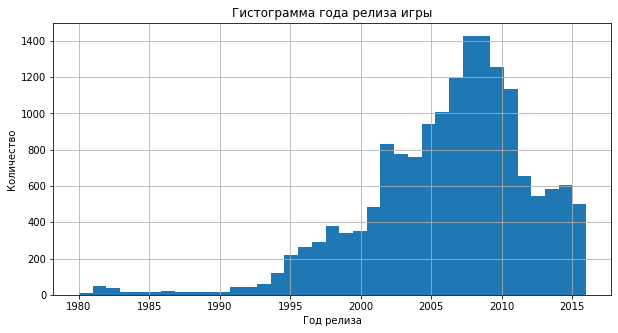

In [29]:
#  смотрим гистаграмму в диапозоне значений
df['year_of_release'].plot(
    y='year_of_release', 
    kind='hist', 
    bins=37, 
    range=(1980,2016),
    figsize = (10,5),
    grid=True);
plt.title('Гистограмма года релиза игры')
plt.xlabel('Год релиза')
plt.ylabel('Количество')
plt.show()

Резкий рост объема выпущенных игр виден с 2002 года с пиком -2009 гг. Заметно снижение объема с 2012 года. Для целей исследования выделим года, по которым будет оптимально анализировать динамику продаж. Диапазон 2002-2016 г. Более ранний срок мало скажет о закономерностях успешности современных игр на популярных платформах в данный момент.

In [30]:
# оставим в датафрейме только нужные года
df_year = df.query("2002 <= year_of_release <= 2016").reset_index(drop=True)

#### Как менялись продажи по платформам.

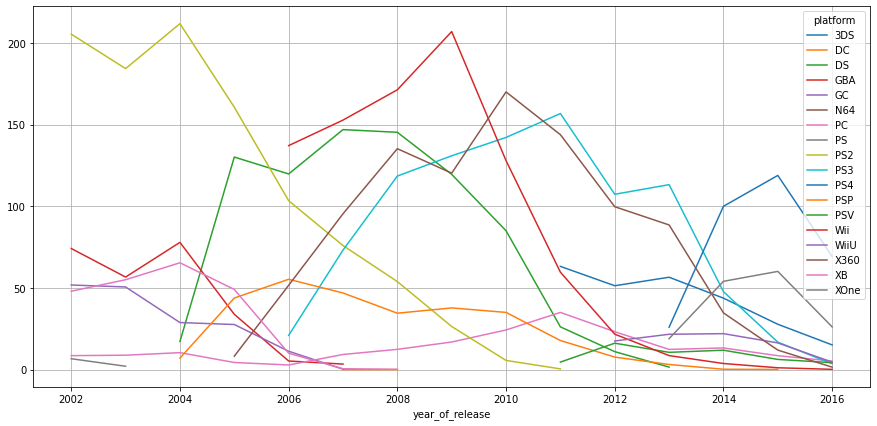

In [31]:
# построим график распределения по годам платформ с долями проданных копий
df_year.pivot_table(
    index='year_of_release', columns = 'platform', values='sales', aggfunc='sum').plot(grid=True, figsize=(15, 7))
plt.show()

Отчетливо видны падения продаж на устаревающих платформах в период 2006-2008г. Так же спад продаж на консолях следующего поколения начиная с 2012 года. И рост продаж на платформах последнего поколения РS4 и XOne.

#### Рассмотрим какой срок жизни у платформы

In [32]:
# суммируем по количеству релизов в год каждой платформы
term = (df.loc[:,['year_of_release', 'platform']]
        .drop_duplicates() # убираем дубликаты 
         # кол-во лет релизов каждой платформы с 2002 года
        .pivot_table(index=['platform'], values='year_of_release', aggfunc='count')
       )
term.sort_values(by='year_of_release', ascending=False).head(15)

,year_of_release
platform,
PC,26
GB,13
NES,12
X360,12
PSP,12
PS2,12
Wii,11
DS,11
PS3,11


In [33]:
term.year_of_release.describe() # общие показатели группы

count    31.000000
mean      7.677419
std       5.081910
min       1.000000
25%       4.000000
50%       7.000000
75%      11.000000
max      26.000000
Name: year_of_release, dtype: float64

Средний возраст платформы утвердим 7 лет. 

In [34]:
# оставим в датафрейме только последние года с современными платформами
df = df.query("2013 <= year_of_release <= 2016").reset_index(drop=True)

In [36]:
display(df.pivot_table(index=['platform'], values='sales', aggfunc='sum').sort_values(by='sales', ascending=False))

,sales
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80
WiiU,64.63
PC,39.43
PSV,32.99
Wii,13.66


Наиболее прибыльные платформы последних лет - PS4, XOne, 3DS, PS3, X360. Самые перспективные платформы с точки зрения срока платформы на рынке и роста продаж PS4, XOne. Небольшие объемы продаж этаж платформ в 2016 году на графике связаны с неполным периодом года в данных. Выберем актуальный период и определим его с учетом нашей цели построить прогноз на следующий год с 2013 по 2016 годы.

#### Cтроим график «ящик с усами»

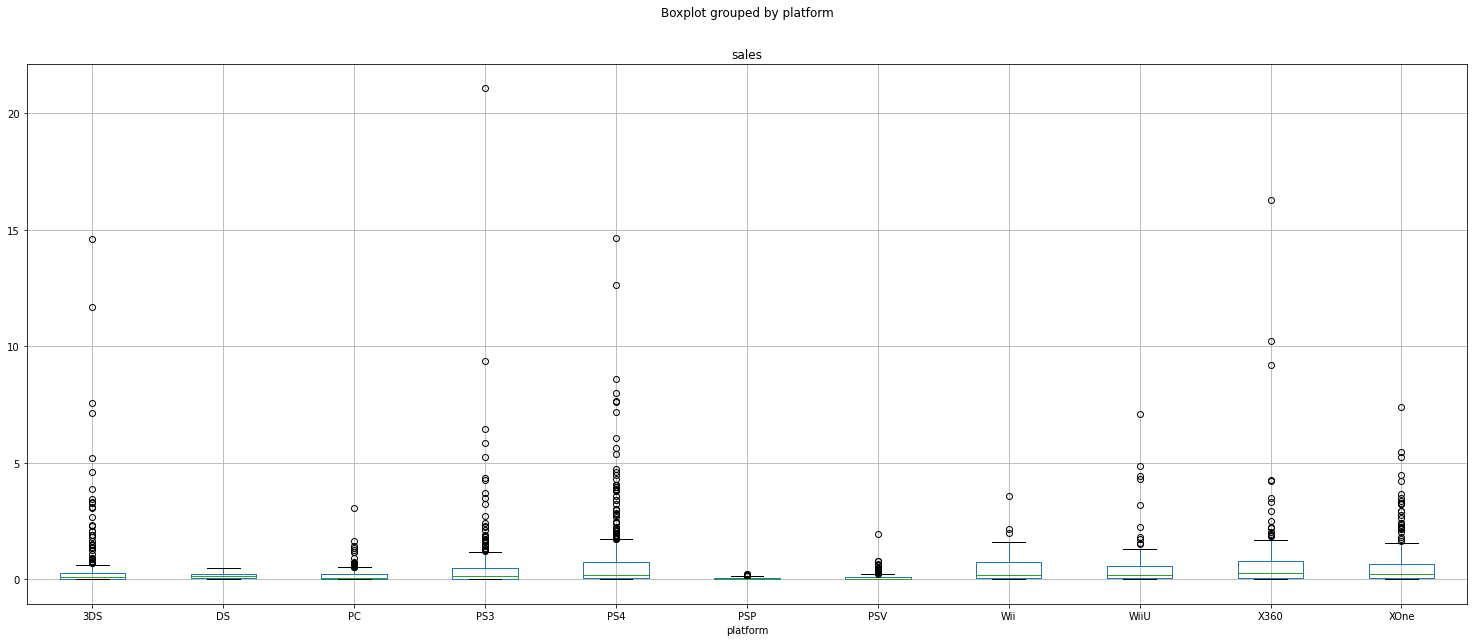

In [37]:
# построим общую диаграмму размаха по платформам
df.boxplot(column='sales', by='platform', figsize=(25,10));
plt.show()

В представленной диаграмме мы видим, что есть очень редкие выбросы с продажами более 20 млн (видимо эта игра была очень популярна), так же редкие, в отличие от других, выбросы есть в диапазоне от 5 до 20 млн. Уберем эти выбросы и еще раз посмотрим на диаграмму размаха.

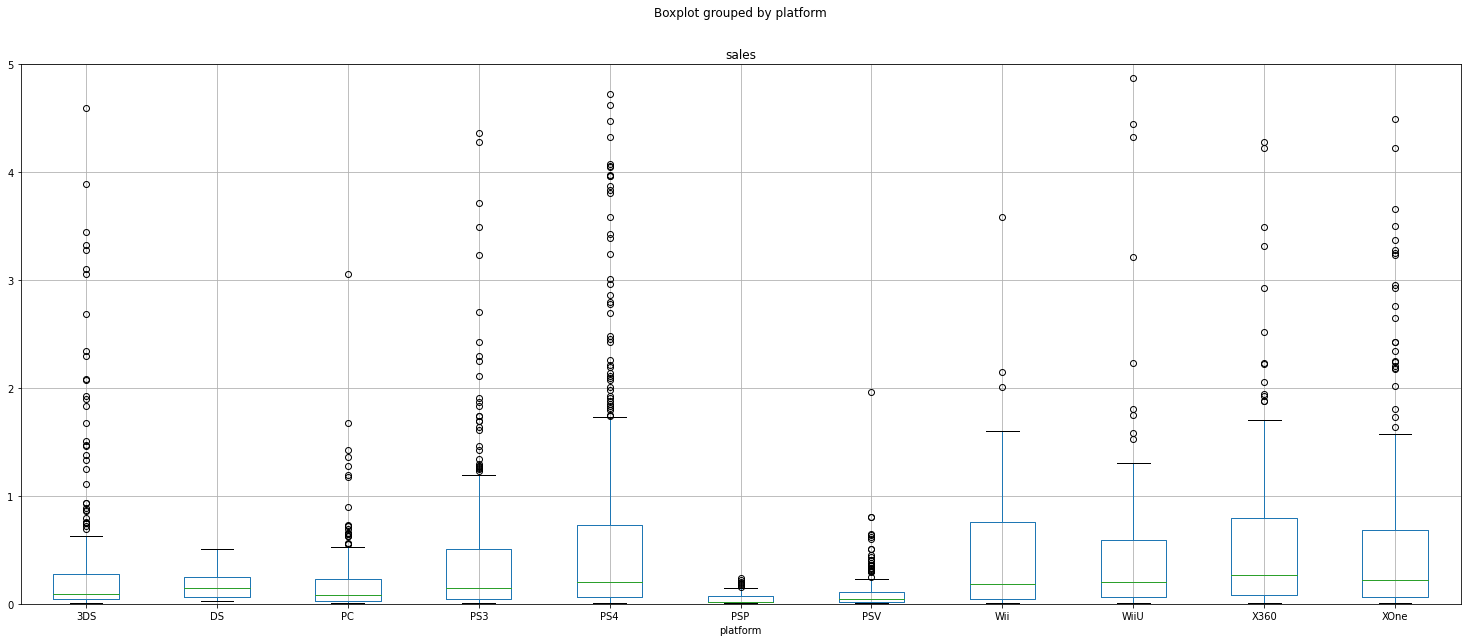

In [38]:
# построим общую диаграмму размаха в диапозоне до 5 млн.продаж
df.boxplot(column='sales', by='platform', figsize=(25,10));
plt.ylim(0, 5)
plt.show()

На данной диаграмме хорошо видно тело боксплота. Наблюдаем, что наши перспективные платформы PS4, XOne схожи по распределению, хоть и объем продаж PS4 немного больше.

#### Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.

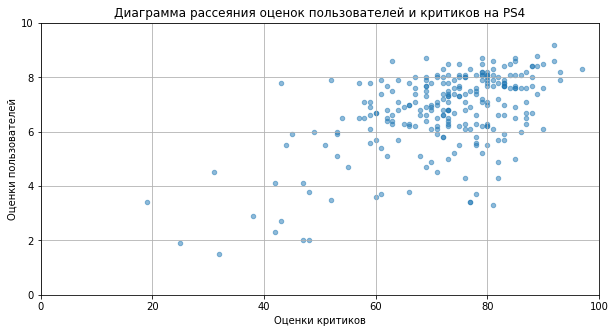

In [39]:
df_PS4 = df[df['platform'] == 'PS4']
# построим диаграмму рассеяния для более информативного графика цены и площади
df_PS4.plot(x='critic_score', 
          y='user_score', 
          kind='scatter',
          alpha= 0.5,
          ylim = ( 0 ,10),
          xlim = ( 0 ,100),
          grid= True,
          figsize=(10, 5)
          );
plt.title('Диаграмма рассеяния оценок пользователей и критиков на PS4')
plt.xlabel('Оценки критиков')
plt.ylabel('Оценки пользователей')
plt.show() 

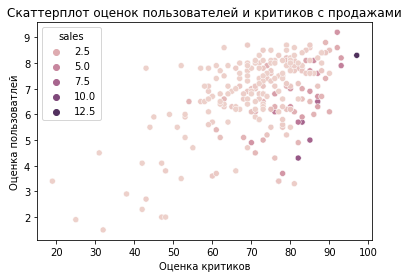

0.40656790206178095

-0.031957110204556376

In [49]:
# используем seaborn, что бы увидеть корреляцию с продажами
sns.scatterplot(df_PS4['critic_score'], df_PS4['user_score'], hue=df_PS4['sales'])
plt.title('Скаттерплот оценок пользователей и критиков с продажами')
plt.xlabel('Оценка критиков')
plt.ylabel('Оценка пользоватлей')
plt.show() 
# корреляция цены от площади
display(df_PS4['critic_score'].corr(df_PS4['sales']))
display(df_PS4['user_score'].corr(df_PS4['sales']))

Общая тенденция такая, что ни каждая игра с хорошей оценкой от критиков имеет хорошую у пользователей. И даже имеются игры с большими продажами и низким рейтингом пользователей. Практически все игры с большими продажами имеют большую оценку от критиков (корреляция составляет 0,4 и она видна на диаграмме). Большинство игр имеют положительную оценку. Снова видна игра с аномально большими продажами и высокими оценками.

Сравним выводы с продажами игр на других платформах.

In [41]:
df.groupby('platform')['sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,303.0,0.472772,1.381347,0.01,0.0400,0.090,0.2800,14.60
DS,8.0,0.192500,0.172026,0.03,0.0675,0.150,0.2525,0.51
PC,189.0,0.208624,0.352304,0.01,0.0300,0.080,0.2300,3.05
PS3,345.0,0.525884,1.451939,0.01,0.0400,0.150,0.5100,21.05
PS4,392.0,0.801378,1.609456,0.01,0.0600,0.200,0.7300,14.63
PSP,67.0,0.052239,0.059768,0.01,0.0150,0.020,0.0700,0.24
PSV,358.0,0.092151,0.153816,0.01,0.0200,0.040,0.1100,1.96
Wii,23.0,0.593913,0.915432,0.01,0.0450,0.180,0.7550,3.58
WiiU,115.0,0.562000,1.038778,0.01,0.0600,0.200,0.5950,7.09


Оценки критиков и пользователей влияют на продажи, как на самой популярной платформе, так и на остальных. 
PS4  является лидером по продажам. В менее популярных платформах продажи значительно ниже, за юсключением X360 и платформ PS3,PSV. Вместе с тем, первый,третий квартилии и средняя выше только у PS4,X360, и боксплот изобилует выбросами вверх. Это говорит, о том что игр на платформе много с большими долями продаж и явными хитами. Убеждаемся в правильности выбора перспективных платформ PS4,X360.

#### Распределение игр по жанрам

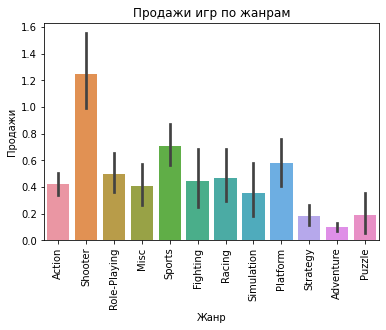

In [54]:
sns.barplot(y=df['sales'], x=df['genre']);
plt.title('Продажи игр по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Продажи')
plt.xticks(rotation=90)
plt.show() 

In [43]:
# сортируем по средним показателям продаж платформ.
df.groupby('genre')['sales'].describe().sort_values(by='mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Shooter,187.0,1.245882,2.014107,0.01,0.14,0.450,1.4250,14.63
Sports,214.0,0.703972,1.219237,0.01,0.07,0.240,0.7650,8.58
Platform,74.0,0.576081,0.806808,0.01,0.09,0.225,0.6275,4.32
Role-Playing,292.0,0.499623,1.353164,0.01,0.06,0.125,0.3825,14.60
Racing,85.0,0.469294,0.964101,0.01,0.05,0.120,0.3800,7.09
Fighting,80.0,0.441375,1.048883,0.01,0.06,0.125,0.3225,7.55
Action,766.0,0.420196,1.253909,0.01,0.03,0.110,0.3375,21.05
Misc,155.0,0.405290,1.007985,0.01,0.03,0.100,0.3300,9.18
Simulation,62.0,0.350968,0.849163,0.01,0.03,0.100,0.2950,5.22


Самые популярные жанры: Action, Shooter, Sports, Role-Playing, Adventure. Самые низкие продажи у жанра Puzzle.
Несомненным лидером является Shooter, средняя и медиана которого выше других. Делаем вывод, что Shooter самый прибыльный жанр.

### Составляем портрет пользователя каждого региона

#### Самые популярные платформы (топ-5)

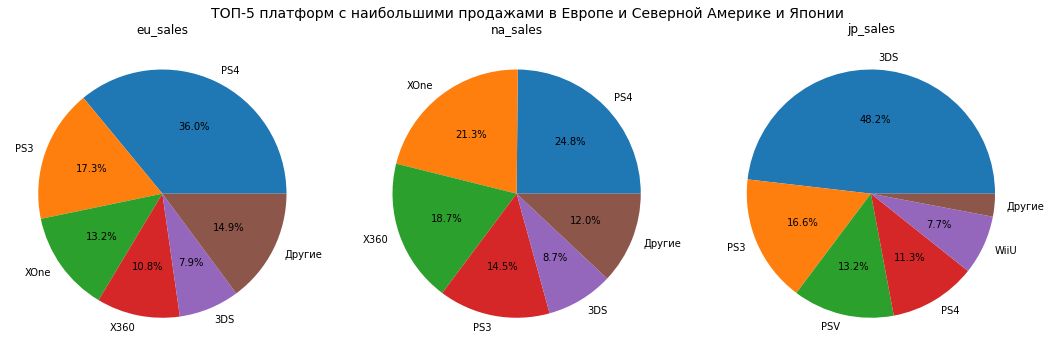

In [44]:
regions_sales = ['eu_sales', 'na_sales', 'jp_sales']
fig, ax = plt.subplots(1, len(regions_sales), figsize=(15,5))
for i, region in enumerate(regions_sales):
    region_platform = df.query('year_of_release >= 2013').groupby('platform').agg({region: 'sum'}).sort_values(by=region, ascending=False).reset_index()
    region_platform.loc[5] = ['Другие', region_platform.loc[5:][region].sum().round(2)]
    region_top_platform = region_platform.head(6)        
    ax[i].pie(region_top_platform[region], labels=region_top_platform['platform'], autopct=lambda x: f'{x:.1f}%' if x > 5 else None)
    ax[i].set_title(region)
plt.suptitle('ТОП-5 платформ с наибольшими продажами в Европе и Северной Америке и Японии', fontsize=14)
plt.tight_layout()
plt.show()

Самые популярные платформы (топ-5) в Европе: PS4, XOne, PS3, 3DS, PC;
CША: PS4, XOne, PS3, 3DS, X360;
Япония: 3DS, PS4, PSV, PS3, WiiU.
На лицо приверженность регионов к "родным" консолям, там где находится компания-производитель, там и лучший спрос на ее продукцию. Очевидно так же, что самую большую долю во всех регионах, кроме Японии занимает PS4.

#### Самые популярные жанры (топ-5)

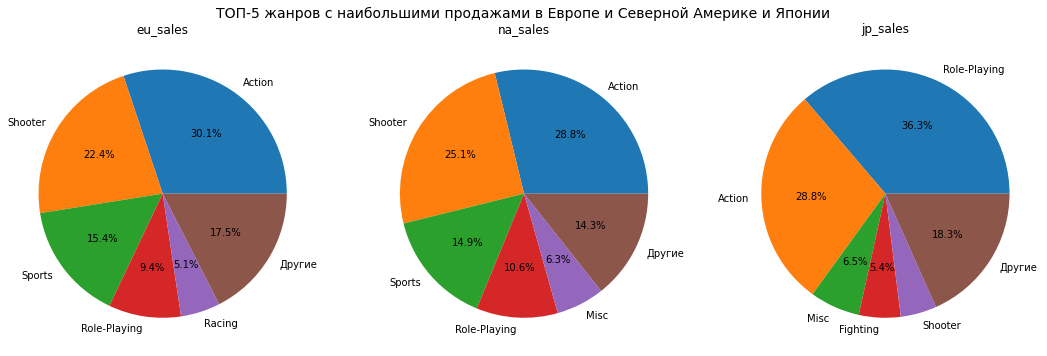

In [45]:
fig, ax = plt.subplots(1, len(regions_sales), figsize=(15,5))
for i, region in enumerate(regions_sales):
    region_genre = df.query('year_of_release >= 2013').groupby('genre').agg({region: 'sum'}).sort_values(by=region, ascending=False).reset_index()
    region_genre.loc[5] = ['Другие', region_genre.loc[5:][region].sum().round(2)]
    region_top_genre = region_genre.head(6)        
    ax[i].pie(region_top_genre[region], labels=region_top_genre['genre'], autopct=lambda x: f'{x:.1f}%' if x > 5 else None)
    ax[i].set_title(region)
plt.suptitle('ТОП-5 жанров с наибольшими продажами в Европе и Северной Америке и Японии', fontsize=14)
plt.tight_layout()
plt.show()

В зависимости от региона доля разных жанров в продажах сильно разниться. В Японии популярны больше остальных регионов, ролевые игры. Action популярны везде, а Shooter в Европе и США.

#### Влияние рейтинга ESRB на продажи в отдельном регионе

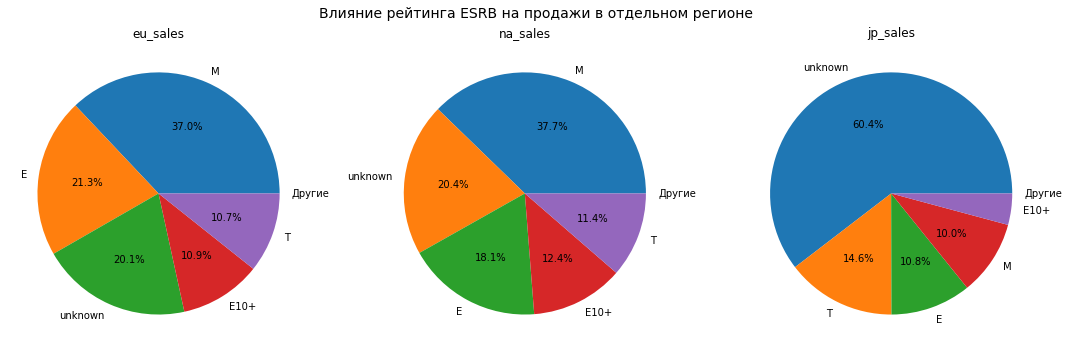

In [46]:
fig, ax = plt.subplots(1, len(regions_sales), figsize=(15,5))
for i, region in enumerate(regions_sales):
    region_rating = df.query('year_of_release >= 2013').groupby('rating').agg({region: 'sum'}).sort_values(by=region, ascending=False).reset_index()
    region_rating.loc[5] = ['Другие', region_rating.loc[5:][region].sum().round(2)]
    region_top_rating = region_rating.head(6)        
    ax[i].pie(region_top_rating[region], labels=region_top_rating['rating'], autopct=lambda x: f'{x:.1f}%' if x > 5 else None)
    ax[i].set_title(region)
plt.suptitle('Влияние рейтинга ESRB на продажи в отдельном регионе', fontsize=14)
plt.tight_layout()
plt.show()

В Японии рейтинги у игр, в которых жанры неопределенны являются аномально большими, это связано с нашей пред обработкой данных (заполнение пропусков "заглушкой"). Самые популярные жанры Т («Подросткам»: Игра подходит для лиц от 13 лет.), Е («Для всех») и М («Для взрослых»: Материалы игры не подходят для подростков младше 17 лет).  В Японии своя рейтинговая система и сравнивать ее с другими регионами не корректно.

В Европе самые высокие рейтинги у жанра M («Для взрослых»: Материалы игры не подходят для подростков младше 17 лет.), Е («Для всех»). Далее по популярности игры, в которых жанры неопределенны.

В Северной Америке самые высокие рейтинги у жанра M («Для взрослых»: Материалы игры не подходят для подростков младше 17 лет.), далее по популярности игры, в которых жанры неопределенны, Е («Для всех») и Е10+ «Для всех от 10 лет и старше».

**Рейтинг ESRB на продажи в отдельном регионе влияет незначительно. Самый популярный рейтинг во всех регионах M («Для взрослых»: Материалы игры не подходят для подростков младше 17 лет.)**

### Проверка гипотез

#### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Нулевая гипотеза гласит, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Альтернативная же звучит как - средние пользовательские рейтинги платформ Xbox One и PC разные.

In [47]:
from scipy import stats as st
import numpy as np

sample_1 = df.query('platform == "XOne"')['user_score'].dropna().astype('float')
sample_2 = df.query('platform == "PC"')['user_score'].dropna().astype('float')

alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind( # проверяем гипотезу о равенстве средних двух независимых совокупностей
    sample_1, 
    sample_2,
    equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha: # сравниваем получившееся p-значение с заданным уровнем статистической значимости:
    print("Отвергаем нулевую гипотезу") 
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


Критерий - это правило, по которому мы отвергаем или не отвергаем нулевую гипотезу на основе выборочных наблюдений. Не получилось отвергнуть нулевую гипотезу.

#### Средние пользовательские рейтинги жанров Action и Sports разные.

Нулевая гипотеза гласит, что cредние пользовательские рейтинги жанров Action и Sports одинаковые. 

Альтернативная же звучит как - cредние пользовательские рейтинги жанров Action и Sports разные.

In [48]:
sample_1 = df.query('genre == "Action"')['user_score'].dropna().astype('float')
sample_2 = df.query('genre == "Sports"')['user_score'].dropna().astype('float')

alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind( # проверяем гипотезу о равенстве средних двух независимых совокупностей
    sample_1, 
    sample_2,
    equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha: # сравниваем получившееся p-значение с заданным уровнем статистической значимости:
    print("Отвергаем нулевую гипотезу") 
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 1.4460039700704315e-20
Отвергаем нулевую гипотезу


Критерий - это правило, по которому мы отвергаем или не отвергаем нулевую гипотезу на основе выборочных наблюдений. Отвергаем нулевую гипотезу.

### Общий вывод

**Исследование успешности игр**


**Изначально проведен общий анализ**

Обнаружены пропуски в датасете, количество в некоторых столбце достигало 88%. Количество столбцов с пропусками 6 (всего в датасете 11 столбца). Явных дубликатов нет.
Необходимо скорректировать  user_score(оценки пользователей) - некорректный тип, должен быть с плавающей точкой. Так же разно регистровое наименование столбцов.

**Подготовка данных**

Изменены типы данных. Устранены пропуски «заглушками», где-то оставили пропуски. Устранено разно регистровое наименование столбцов.
Удалили пустые строки с годом релиза игры т.к. их доля в дадасете всего 1,6% и данный параметр один из самых важных при исследовании. Так же в этих строках имеются пропуски рейтинга, оценок критиков и пользователей. Таким образом мы оптимизировали датаесет сразу по нескольким параметрам.
Аббревиатура 'tbd' в столбце с оценкой встречается чаще всего и равномерно распределен по годам (заменили на nan). Пропусков в столбцах название игры и жанр всего 2. Оставили их, на исследование не повлияют.
После предобработки данных процент пропусков больше половины имеется в столбцах оценок пользователей и критиков. Их слишком много, чтобы мы могли их удалить или восстановить каким-либо логическим способом. Заполнять их медианой или средним считаем не верным т.к. это приведет к аномальным значениям на графиках и искажениям исследования.

**Проводим исследовательский анализ данных**

**Cколько игр выпускалось в разные годы.**

Резкий рост объема выпущенных игр виден с 2002 года с пиком -2009 гг. Заметно снижение объема с 2012 года. Для целей исследования выделим года, по которым будет оптимально анализировать динамику продаж. Диапазон 2002-2016 г. Более ранний срок мало скажет о закономерностях успешности современных игр на популярных платформах в данный момент.

**Как менялись продажи по платформам.**

Отчетливо видны падения продаж на устаревающих платформах в период 2006-2008г. Так же спад продаж на консолях следующего поколения начиная с 2012 года. И рост продаж на платформах последнего поколения РS4 и XOne.

**Рассмотрим какой срок жизни у платформы**

Средний возраст платформы утвердили 7 лет.
Наиболее прибыльные платформы последних лет - PS4, XOne, 3DS, PS3, X360. Самые перспективные платформы с точки зрения срока платформы на рынке и роста продаж PS4, XOne. Небольшие объемы продаж этаж платформ в 2016 году на графике связаны с неполным периодом года в данных. Выберем  актуальный период и определим его с учетом нашей цели построить прогноз на следующий год с 2013 по 2016 годы.

**Cтроим график «ящик с усами»**

В представленной диаграмме мы видим, что есть очень редкие выбросы с продажами более 20 млн (видимо эта игра была очень популярна), так же редкие, в отличие от других, выбросы есть в диапазоне от 5 до 20 млн.
На боксплоте меньшего диапазона наблюдаем, что наши перспективные платформы PS4, XOne схожи по распределению, хоть и объем продаж PS4 немного больше.

**Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.**

Общая тенденция такая, что ни каждая игра с хорошей оценкой от критиков имеет хорошую у пользователей. И даже имеются игры с большими продажами и низким рейтингом пользователей. Практически все игры с большими продажами имеют большую оценку от критиков (корреляция составляет 0,4 и она видна на диаграмме). Большинство игр имеют положительную оценку. Снова видна игра с аномально большими продажами и высокими оценками.
    
PS4 является лидером по продажам. В менее популярных платформах продажи значительно ниже, за исключениям X360 и платформ PS3,PSV. Вместе с тем, первый, третий квартили и средняя выше только у PS4,X360, и боксплот изобилует выбросами вверх. Это говорит, о том что игр на платформе много с большими долями продаж и явными хитами. Убеждаемся в правильности выбора перспективных платформ PS4,X360.

**Распределение игр по жанрам**

Самые популярные жанры: Action, Shooter, Sports, Role-Playing. Самые низкие продажи у жанра Puzzle.

Несомненным лидером по прибыльности является Shooter, средняя и медиана которого выше других.

**Составляем портрет пользователя каждого региона:**

**Самые популярные платформы (топ-5)**

Самые популярные платформы (топ-5) в Европе: PS4, XOne, PS3, 3DS, PC;
CША: PS4, XOne, PS3, 3DS, X360;
Япония: 3DS, PS4, PSV, PS3, WiiU.
На лицо приверженность регионов к "родным" консолям, там где находится компания-производитель, там и лучший спрос на ее продукцию. Очевидно так же, что самую большую долю во всех регионах занимает PS4.

**Самые популярные жанры (топ-5)**

В зависимости от региона доля разных жанров в продажах сильно разниться. В Японии популярны больше остальных регионов, ролевые игры. Action популярны везде, а Shooter в Европе и США.

**Влияние рейтинга ESRB на продажи в отдельном регионе**

Рейтинг ESRB на продажи в отдельном регионе влияет незначительно. Самый популярный рейтинг во всех регионах M («Для взрослых»: Материалы игры не подходят для подростков младше 17 лет.)

**Проверка гипотез:**

**Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

Нулевая гипотеза гласит, что средние пользовательские рейтинги платформ Xbox One и PC разные. Альтернативная же звучит как - средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Критерий - это правило, по которому мы отвергаем или не отвергаем нулевую гипотезу на основе выборочных наблюдений. Итог: p-значение: 0.14759594013430463
,
Не получилось отвергнуть нулевую гипотезу.

**Средние пользовательские рейтинги жанров Action и Sports разные.**

Нулевая гипотеза гласит, что cредние пользовательские рейтинги жанров Action и Sports одинаковые. Альтернативная же звучит как - cредние пользовательские рейтинги жанров Action и Sports разные. Итог: p-значение: 1.4460039700704315e-20,
Не получилось отвергнуть нулевую гипотезу.

**Итоги:**

**На успешность игры в следующем году больше всего повлияют: жанр (Action), оценка критиков (более 7), платформа (PS4, XOne), срок жизни платформы, рейтинг М («Для взрослых»).  Несмотря на падение рынка в последние годы платформы PS4, XOne имеют начальный срок жизни и значительные объемы продаж на текущий момент, а так же хитовые (аномальные) игры, что будет привлекать новых игроков на платформу и разработчиков игр. Однозначным лидером по всем регионам является платформа PS4.**

**И так сделать ставку на потенциально популярный продукт и спланировать рекламные кампании следует на продукт который разработан для платформы PS4, с жанром Action, рейтингом М и развивать во всех регионах.**